In [1]:
from pyropy2 import spread_model_vesta2 as v2
from pyropy2 import helpers as h
import pandas as pd
import numpy as np

from pathlib import Path
from fdrs_calcs import spread_models as sm

import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.feature_selection import mutual_info_regression

In [2]:
# analyse data from milson's gully area for 28/11/2025 for 5 days
weather_pth = Path(r"D:\Case_Studies\Milsons_Gully_Vesta2_20251129T1100\Milsons_Gully_Vesta2_20251129T1100_150.38_-32.346_forecast.csv")
df = pd.read_csv(weather_pth)
df.head()

,time,date,hour,temperature,relative_humidity,wind_direction,wind_magnitude,drought_factor,curing,drought_index,kbdi
0,2025-11-29 04:00:00+11:00,29/11/2025,4:00:00,16.200000,63.7,218.60000,6,7.6,70.628,142.1,77.4
1,2025-11-29 05:00:00+11:00,29/11/2025,5:00:00,15.900001,65.3,203.20000,7,7.6,70.628,142.1,77.4
2,2025-11-29 06:00:00+11:00,29/11/2025,6:00:00,16.300001,63.7,215.00000,7,7.6,70.628,142.1,77.4
3,2025-11-29 07:00:00+11:00,29/11/2025,7:00:00,19.100000,55.2,239.30000,7,7.6,70.628,142.1,77.4
4,2025-11-29 08:00:00+11:00,29/11/2025,8:00:00,23.200000,38.3,261.30002,10,7.6,70.628,142.1,77.4


In [3]:
# Check current data types
print("Current data types:")
print(df.dtypes)
print("\nSample values:")
print("time column:", df['time'].iloc[0], type(df['time'].iloc[0]))
print("date column:", df['date'].iloc[0], type(df['date'].iloc[0]))
print("hour column:", df['hour'].iloc[0], type(df['hour'].iloc[0]))

Current data types:
time                  object
date                  object
hour                  object
temperature          float64
relative_humidity    float64
wind_direction       float64
wind_magnitude         int64
drought_factor       float64
curing               float64
drought_index        float64
kbdi                 float64
dtype: object

Sample values:
time column: 2025-11-29 04:00:00+11:00 <class 'str'>
date column: 29/11/2025 <class 'str'>
hour column: 4:00:00 <class 'str'>


In [4]:

df['time'] = pd.to_datetime(df['time'])
df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_timedelta(df['hour'])
print(df.dtypes)


time                 datetime64[ns, UTC+11:00]
date                            datetime64[ns]
hour                           timedelta64[ns]
temperature                            float64
relative_humidity                      float64
wind_direction                         float64
wind_magnitude                           int64
drought_factor                         float64
curing                                 float64
drought_index                          float64
kbdi                                   float64
dtype: object


C:\Users\geoffg\AppData\Local\Temp\ipykernel_27400\3408521519.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [5]:
param_dict = {
    'wrf': 3.5,
    'fuel_load_surface': 15,
    'slope': 0,
    'FHS_elevated': 3,
    'height_elevated': 2,    
}

In [6]:
df['height_understorey'] = v2.calc_height_understorey(param_dict['FHS_elevated'],param_dict['height_elevated'])
df.head()

,time,date,hour,temperature,relative_humidity,wind_direction,wind_magnitude,drought_factor,curing,drought_index,kbdi,height_understorey
0,2025-11-29 04:00:00+11:00,2025-11-29,0 days 04:00:00,16.200000,63.7,218.60000,6,7.6,70.628,142.1,77.4,1.04
1,2025-11-29 05:00:00+11:00,2025-11-29,0 days 05:00:00,15.900001,65.3,203.20000,7,7.6,70.628,142.1,77.4,1.04
2,2025-11-29 06:00:00+11:00,2025-11-29,0 days 06:00:00,16.300001,63.7,215.00000,7,7.6,70.628,142.1,77.4,1.04
3,2025-11-29 07:00:00+11:00,2025-11-29,0 days 07:00:00,19.100000,55.2,239.30000,7,7.6,70.628,142.1,77.4,1.04
4,2025-11-29 08:00:00+11:00,2025-11-29,0 days 08:00:00,23.200000,38.3,261.30002,10,7.6,70.628,142.1,77.4,1.04


In [7]:
wet_forest=False

In [8]:
df.head()

,time,date,hour,temperature,relative_humidity,wind_direction,wind_magnitude,drought_factor,curing,drought_index,kbdi,height_understorey
0,2025-11-29 04:00:00+11:00,2025-11-29,0 days 04:00:00,16.200000,63.7,218.60000,6,7.6,70.628,142.1,77.4,1.04
1,2025-11-29 05:00:00+11:00,2025-11-29,0 days 05:00:00,15.900001,65.3,203.20000,7,7.6,70.628,142.1,77.4,1.04
2,2025-11-29 06:00:00+11:00,2025-11-29,0 days 06:00:00,16.300001,63.7,215.00000,7,7.6,70.628,142.1,77.4,1.04
3,2025-11-29 07:00:00+11:00,2025-11-29,0 days 07:00:00,19.100000,55.2,239.30000,7,7.6,70.628,142.1,77.4,1.04
4,2025-11-29 08:00:00+11:00,2025-11-29,0 days 08:00:00,23.200000,38.3,261.30002,10,7.6,70.628,142.1,77.4,1.04


In [9]:
df['fuel_moisture'] = sm.dry_forest.fuel_moisture_model(
        df.temperature,
        df.relative_humidity,
        (df.time.dt.month,df.time.dt.hour),
        wet_forest=wet_forest
    )

df['fuel_availability'] = v2.calc_fuel_availability(
        df.drought_factor, 
        wet_forest=wet_forest
    )

df['ros_phase1'] = v2.calc_ros_phase1(
        df.wind_magnitude, 
        df.fuel_moisture, 
        df.fuel_availability, 
        param_dict['fuel_load_surface'], 
        param_dict['wrf'], 
        slope = param_dict['slope']
    )

df['ros_phase2'] = v2.calculate_ros_phase2(
        df.wind_magnitude, 
        df.fuel_moisture, 
        df.fuel_availability, 
        param_dict['fuel_load_surface'], 
        param_dict['wrf'], 
        df.height_understorey, 
        slope = param_dict['slope']
    )

df['ros_phase3'] = v2.calc_ros_phase3(
        df.wind_magnitude, 
        df.fuel_moisture, 
        df.fuel_availability
    )

df['probability_phase2'] = v2.calc_probability_phase2(
        df.wind_magnitude, 
        df.fuel_moisture, 
        df.fuel_availability, 
        param_dict['fuel_load_surface'], 
        param_dict['wrf']
    )

df['probability_phase3'] = v2.calc_probability_phase3(df.wind_magnitude, 
        df.fuel_moisture, 
        df.fuel_availability, 
        df.ros_phase2
    )

df['ROS'] = v2.calc_rate_of_spread(
        df.ros_phase1, 
        df.ros_phase2, 
        df.ros_phase3, 
        df.probability_phase2, 
        df.probability_phase3
    )

df.head()

,time,date,hour,temperature,relative_humidity,wind_direction,wind_magnitude,drought_factor,curing,drought_index,kbdi,height_understorey,fuel_moisture,fuel_availability,ros_phase1,ros_phase2,ros_phase3,probability_phase2,probability_phase3,ROS
0,2025-11-29 04:00:00+11:00,2025-11-29,0 days 04:00:00,16.200000,63.7,218.60000,6,7.6,70.628,142.1,77.4,1.04,14.91014,0.925653,6.387261,80.210992,94.211984,0.015463,0.000000e+00,7.528764
1,2025-11-29 05:00:00+11:00,2025-11-29,0 days 05:00:00,15.900001,65.3,203.20000,7,7.6,70.628,142.1,77.4,1.04,15.24143,0.925653,6.132945,87.471429,108.695832,0.022543,0.000000e+00,7.966580
2,2025-11-29 06:00:00+11:00,2025-11-29,0 days 06:00:00,16.300001,63.7,215.00000,7,7.6,70.628,142.1,77.4,1.04,14.90531,0.925653,6.391218,91.155055,113.273267,0.024953,0.000000e+00,8.506310
3,2025-11-29 07:00:00+11:00,2025-11-29,0 days 07:00:00,19.100000,55.2,239.30000,7,7.6,70.628,142.1,77.4,1.04,12.06930,0.925653,10.036488,143.145909,177.879381,0.099984,0.000000e+00,23.345273
4,2025-11-29 08:00:00+11:00,2025-11-29,0 days 08:00:00,23.200000,38.3,261.30002,10,7.6,70.628,142.1,77.4,1.04,9.02870,0.925653,84.913000,318.248631,450.549249,0.871531,5.211078e-07,288.272287


In [10]:
df_model_range = df.copy(deep=True)

model_ros_lims = {
    'phase2': 100,
    'phase3': 1000
}

#  set probability_phase2 = 0 if ros_phase2 < model_ros_lims['phase2']
df_model_range.loc[df_model_range['ros_phase2'] < model_ros_lims['phase2'], 'probability_phase2'] = 0

#  set probability_phase3 = 0 if ros_phase3 < model_ros_lims['phase3']
df_model_range.loc[df_model_range['ros_phase3'] < model_ros_lims['phase3'], 'probability_phase3'] = 0

df_model_range['ROS'] = v2.calc_rate_of_spread(
        df_model_range.ros_phase1, 
        df_model_range.ros_phase2, 
        df_model_range.ros_phase3, 
        df_model_range.probability_phase2, 
        df_model_range.probability_phase3
    )

df_model_range.head()



,time,date,hour,temperature,relative_humidity,wind_direction,wind_magnitude,drought_factor,curing,drought_index,kbdi,height_understorey,fuel_moisture,fuel_availability,ros_phase1,ros_phase2,ros_phase3,probability_phase2,probability_phase3,ROS
0,2025-11-29 04:00:00+11:00,2025-11-29,0 days 04:00:00,16.200000,63.7,218.60000,6,7.6,70.628,142.1,77.4,1.04,14.91014,0.925653,6.387261,80.210992,94.211984,0.000000,0.0,6.387261
1,2025-11-29 05:00:00+11:00,2025-11-29,0 days 05:00:00,15.900001,65.3,203.20000,7,7.6,70.628,142.1,77.4,1.04,15.24143,0.925653,6.132945,87.471429,108.695832,0.000000,0.0,6.132945
2,2025-11-29 06:00:00+11:00,2025-11-29,0 days 06:00:00,16.300001,63.7,215.00000,7,7.6,70.628,142.1,77.4,1.04,14.90531,0.925653,6.391218,91.155055,113.273267,0.000000,0.0,6.391218
3,2025-11-29 07:00:00+11:00,2025-11-29,0 days 07:00:00,19.100000,55.2,239.30000,7,7.6,70.628,142.1,77.4,1.04,12.06930,0.925653,10.036488,143.145909,177.879381,0.099984,0.0,23.345273
4,2025-11-29 08:00:00+11:00,2025-11-29,0 days 08:00:00,23.200000,38.3,261.30002,10,7.6,70.628,142.1,77.4,1.04,9.02870,0.925653,84.913000,318.248631,450.549249,0.871531,0.0,288.272197


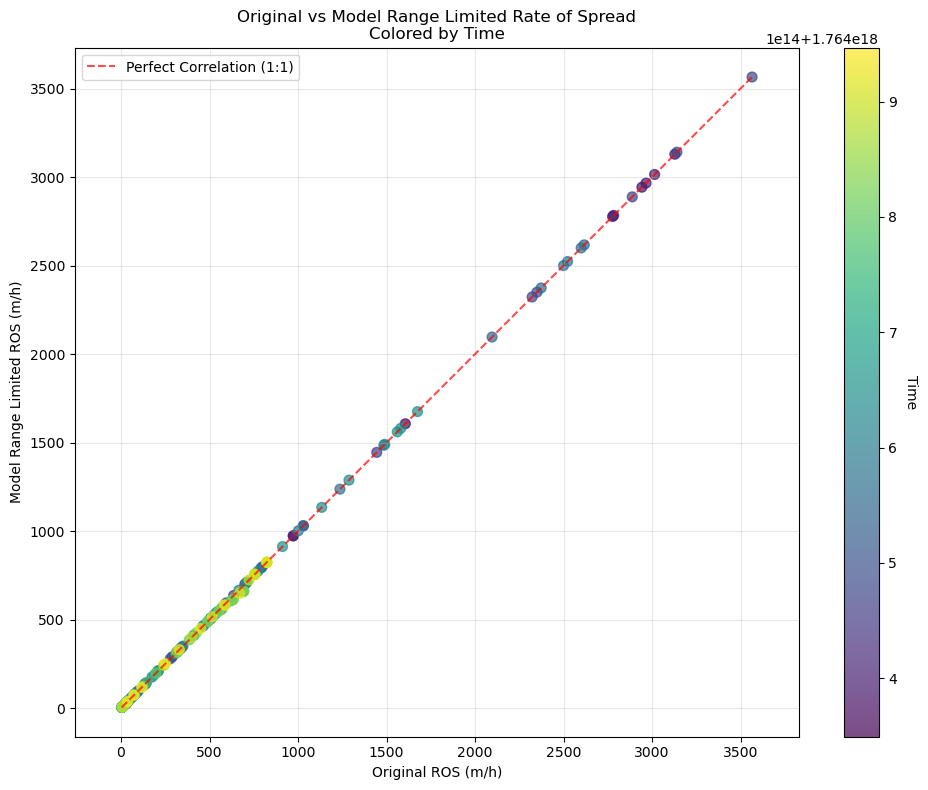

Comparison Statistics:
Original ROS - Mean: 635.85, Max: 3565.04
Limited ROS - Mean: 634.30, Max: 3565.04
Correlation coefficient: 1.0000
Difference (Original - Limited) - Mean: 1.54, Max: 33.48
Number of points where ROS was reduced: 74
Total data points: 167


In [11]:
# scatter plot of df['ROS'] vs df_model_range['ROS'] using the time field to match the data

plt.figure(figsize=(10, 8))

# Create scatter plot with time-based color mapping
scatter = plt.scatter(df['ROS'], df_model_range['ROS'], 
                     c=df['time'], 
                     cmap='viridis', 
                     alpha=0.7, 
                     s=50)

# Add colorbar to show time progression
cbar = plt.colorbar(scatter)
cbar.set_label('Time', rotation=270, labelpad=15)

# Add perfect correlation line (1:1 line)
min_val = min(df['ROS'].min(), df_model_range['ROS'].min())
max_val = max(df['ROS'].max(), df_model_range['ROS'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.7, label='Perfect Correlation (1:1)')

# Labels and title
plt.xlabel('Original ROS (m/h)')
plt.ylabel('Model Range Limited ROS (m/h)')
plt.title('Original vs Model Range Limited Rate of Spread\nColored by Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Equal aspect ratio for better comparison
plt.axis('equal')
plt.tight_layout()
plt.show()

# Print some statistics
print("Comparison Statistics:")
print(f"Original ROS - Mean: {df['ROS'].mean():.2f}, Max: {df['ROS'].max():.2f}")
print(f"Limited ROS - Mean: {df_model_range['ROS'].mean():.2f}, Max: {df_model_range['ROS'].max():.2f}")
print(f"Correlation coefficient: {np.corrcoef(df['ROS'], df_model_range['ROS'])[0,1]:.4f}")

# Show differences
diff = df['ROS'] - df_model_range['ROS']
print(f"Difference (Original - Limited) - Mean: {diff.mean():.2f}, Max: {diff.max():.2f}")
print(f"Number of points where ROS was reduced: {(diff > 0).sum()}")
print(f"Total data points: {len(df)}")

Filtered data: 56 out of 167 points (ROS < 1000)


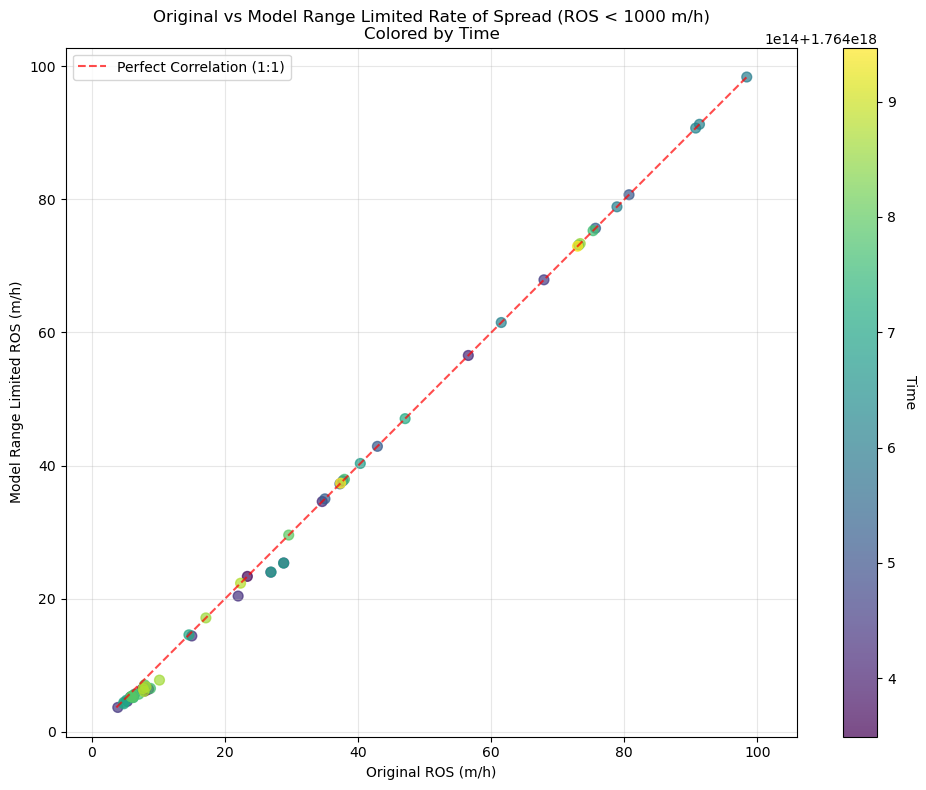


Filtered Data Comparison Statistics (ROS < 1000):
Original ROS - Mean: 31.39, Max: 98.39
Limited ROS - Mean: 30.67, Max: 98.39
Correlation coefficient: 0.9996
Difference (Original - Limited) - Mean: 0.72, Max: 3.45
Number of points where ROS was reduced: 29
Filtered data points: 56

ROS range in filtered data:
Original: 3.87 - 98.39
Limited: 3.65 - 98.39


In [12]:
# Same scatter plot but limited to ROS < 1000

# Filter data where original ROS < 1000
mask = df['ROS'] < 100
df_filtered = df[mask].copy()
df_model_range_filtered = df_model_range[mask].copy()

print(f"Filtered data: {len(df_filtered)} out of {len(df)} points (ROS < 1000)")

plt.figure(figsize=(10, 8))

# Create scatter plot with time-based color mapping for filtered data
scatter = plt.scatter(df_filtered['ROS'], df_model_range_filtered['ROS'], 
                     c=df_filtered['time'], 
                     cmap='viridis', 
                     alpha=0.7, 
                     s=50)

# Add colorbar to show time progression
cbar = plt.colorbar(scatter)
cbar.set_label('Time', rotation=270, labelpad=15)

# Add perfect correlation line (1:1 line)
min_val = min(df_filtered['ROS'].min(), df_model_range_filtered['ROS'].min())
max_val = max(df_filtered['ROS'].max(), df_model_range_filtered['ROS'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.7, label='Perfect Correlation (1:1)')

# Labels and title
plt.xlabel('Original ROS (m/h)')
plt.ylabel('Model Range Limited ROS (m/h)')
plt.title('Original vs Model Range Limited Rate of Spread (ROS < 1000 m/h)\nColored by Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Equal aspect ratio for better comparison
plt.axis('equal')
plt.tight_layout()
plt.show()

# Print statistics for filtered data
print("\nFiltered Data Comparison Statistics (ROS < 1000):")
print(f"Original ROS - Mean: {df_filtered['ROS'].mean():.2f}, Max: {df_filtered['ROS'].max():.2f}")
print(f"Limited ROS - Mean: {df_model_range_filtered['ROS'].mean():.2f}, Max: {df_model_range_filtered['ROS'].max():.2f}")
print(f"Correlation coefficient: {np.corrcoef(df_filtered['ROS'], df_model_range_filtered['ROS'])[0,1]:.4f}")

# Show differences for filtered data
diff_filtered = df_filtered['ROS'] - df_model_range_filtered['ROS']
print(f"Difference (Original - Limited) - Mean: {diff_filtered.mean():.2f}, Max: {diff_filtered.max():.2f}")
print(f"Number of points where ROS was reduced: {(diff_filtered > 0).sum()}")
print(f"Filtered data points: {len(df_filtered)}")

# Show the range of values
print(f"\nROS range in filtered data:")
print(f"Original: {df_filtered['ROS'].min():.2f} - {df_filtered['ROS'].max():.2f}")
print(f"Limited: {df_model_range_filtered['ROS'].min():.2f} - {df_model_range_filtered['ROS'].max():.2f}")

Data points:
  Point 1: ROS=0.5, error=1.27
  Point 2: ROS=1.5, error=0.67
  Point 3: ROS=3, error=0.13
  Point 4: ROS=5, error=-0.26
  Point 5: ROS=7, error=-0.2

r² Values:
Linear Regression:      r² = 0.8171
Power Regression:       r² = 0.9268 (negative values set to 0)
2nd Degree Polynomial:  r² = 0.9986
3rd Degree Polynomial:  r² = 0.9992


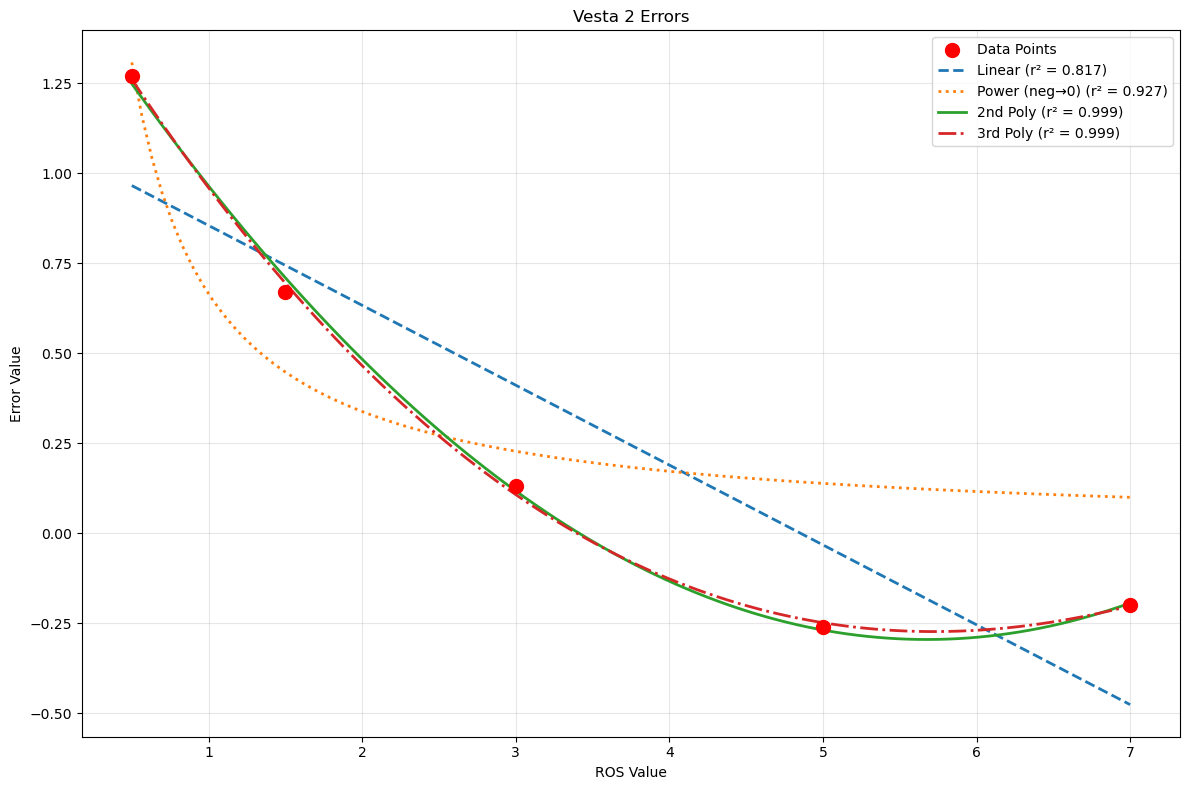


Regression Equations:
Linear:     error = -0.2218ROS + 1.0761
Power:      error = 0.6643 * ROS^-0.9765 (negative y values set to 0)
2nd Poly:   error = 0.0576ROS² + -0.6541ROS + 1.5605
3rd Poly:   error = -0.0020ROS³ + 0.0797ROS² + -0.7194ROS + 1.6005

Best Fit: 3rd Degree Polynomial with r² = 0.9992


In [13]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

error_corrections = [(0.5,1.27), (1.5,0.67), (3,0.13), (5,-0.26), (7, -0.20)]


# Extract x and y values
ROS_vals = np.array([point[0] for point in error_corrections])
error_vals = np.array([point[1] for point in error_corrections])

print("Data points:")
for i, (x, y) in enumerate(error_corrections):
    print(f"  Point {i+1}: ROS={x}, error={y}")

# 1. Linear Regression: y = ax + b
linear_coeffs = np.polyfit(ROS_vals, error_vals, 1)
linear_pred = np.polyval(linear_coeffs, ROS_vals)
linear_r2 = r2_score(error_vals, linear_pred)

# 2. Power Regression: y = a * x^b
# Need to handle negative y values carefully for power regression
def power_func(x, a, b):
    return a * np.power(x, b)

try:
    # For power regression, we need all positive y values, so we'll set negative values to 0
    y_modified = np.where(error_vals < 0, 0, error_vals)
    popt_power, _ = curve_fit(power_func, ROS_vals, y_modified)
    power_pred = power_func(ROS_vals, *popt_power)
    power_r2 = r2_score(y_modified, power_pred)
    power_success = True
except:
    power_r2 = None
    power_success = False

# 3. Polynomial Regressions (2nd and 3rd degree)
poly2_coeffs = np.polyfit(ROS_vals, error_vals, 2)
poly2_pred = np.polyval(poly2_coeffs, ROS_vals)
poly2_r2 = r2_score(error_vals, poly2_pred)

poly3_coeffs = np.polyfit(ROS_vals, error_vals, 3)
poly3_pred = np.polyval(poly3_coeffs, ROS_vals)
poly3_r2 = r2_score(error_vals, poly3_pred)

# Display results
print(f"\nr² Values:")
print(f"Linear Regression:      r² = {linear_r2:.4f}")
if power_success:
    print(f"Power Regression:       r² = {power_r2:.4f} (negative values set to 0)")
else:
    print(f"Power Regression:       Failed (negative y values)")
print(f"2nd Degree Polynomial:  r² = {poly2_r2:.4f}")
print(f"3rd Degree Polynomial:  r² = {poly3_r2:.4f}")

# Create visualization
plt.figure(figsize=(12, 8))

# Create smooth x values for plotting curves
x_smooth = np.linspace(ROS_vals.min(), ROS_vals.max(), 100)

# Plot original data
plt.scatter(ROS_vals, error_vals, color='red', s=100, zorder=5, label='Data Points')

# Plot regression lines
plt.plot(x_smooth, np.polyval(linear_coeffs, x_smooth), 
         '--', linewidth=2, label=f'Linear (r² = {linear_r2:.3f})')

if power_success:
    plt.plot(x_smooth, power_func(x_smooth, *popt_power), 
             ':', linewidth=2, label=f'Power (neg→0) (r² = {power_r2:.3f})')

plt.plot(x_smooth, np.polyval(poly2_coeffs, x_smooth), 
         '-', linewidth=2, label=f'2nd Poly (r² = {poly2_r2:.3f})')

plt.plot(x_smooth, np.polyval(poly3_coeffs, x_smooth), 
         '-.', linewidth=2, label=f'3rd Poly (r² = {poly3_r2:.3f})')

plt.xlabel('ROS Value')
plt.ylabel('Error Value')
plt.title('Vesta 2 Errors')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the equations
print(f"\nRegression Equations:")
print(f"Linear:     error = {linear_coeffs[0]:.4f}ROS + {linear_coeffs[1]:.4f}")
if power_success:
    print(f"Power:      error = {popt_power[0]:.4f} * ROS^{popt_power[1]:.4f} (negative y values set to 0)")
print(f"2nd Poly:   error = {poly2_coeffs[0]:.4f}ROS² + {poly2_coeffs[1]:.4f}ROS + {poly2_coeffs[2]:.4f}")
print(f"3rd Poly:   error = {poly3_coeffs[0]:.4f}ROS³ + {poly3_coeffs[1]:.4f}ROS² + {poly3_coeffs[2]:.4f}ROS + {poly3_coeffs[3]:.4f}")
# Find the best fit
best_models = [
    ('Linear', linear_r2),
    ('2nd Degree Polynomial', poly2_r2),
    ('3rd Degree Polynomial', poly3_r2)
]
if power_success:
    best_models.append(('Power', power_r2))

best_model = max(best_models, key=lambda x: x[1])
print(f"\nBest Fit: {best_model[0]} with r² = {best_model[1]:.4f}")

In [15]:
# Use selected error relationship to modify the ROS values
df_error_modified = df.copy(deep=True)

# Define the power function for error correction
def error_correction_func(ros):
    """Calculate relative error using: error = 0.6643 * ROS^-0.9765"""
    return 0.6643 * np.power(ros, -0.9765)

# Calculate error corrections for all ROS values
error_corrections_calculated = error_correction_func(df_error_modified['ROS'])

# Apply correction - assuming these are relative errors (multiplicative factors)
# Method 1: Relative error correction (1 + error)
df_error_modified['ROS_corrected_relative'] = df_error_modified['ROS'] * (1 + error_corrections_calculated)

# Method 2: Direct multiplicative correction (just multiply by error factor)
df_error_modified['ROS_corrected_direct'] = df_error_modified['ROS'] * error_corrections_calculated

# Method 3: Additive correction (add the error)
df_error_modified['ROS_corrected_additive'] = df_error_modified['ROS'] + error_corrections_calculated

print("Original vs Corrected ROS Comparison:")
print(f"Original ROS - Mean: {df_error_modified['ROS'].mean():.2f}, Range: {df_error_modified['ROS'].min():.2f} to {df_error_modified['ROS'].max():.2f}")
print(f"Relative Corrected - Mean: {df_error_modified['ROS_corrected_relative'].mean():.2f}, Range: {df_error_modified['ROS_corrected_relative'].min():.2f} to {df_error_modified['ROS_corrected_relative'].max():.2f}")
print(f"Direct Corrected - Mean: {df_error_modified['ROS_corrected_direct'].mean():.2f}, Range: {df_error_modified['ROS_corrected_direct'].min():.2f} to {df_error_modified['ROS_corrected_direct'].max():.2f}")
print(f"Additive Corrected - Mean: {df_error_modified['ROS_corrected_additive'].mean():.2f}, Range: {df_error_modified['ROS_corrected_additive'].min():.2f} to {df_error_modified['ROS_corrected_additive'].max():.2f}")

# Show first few rows to see the correction effects
print("\nFirst 10 rows showing correction effects:")
comparison_df = df_error_modified[['ROS', 'ROS_corrected_relative', 'ROS_corrected_direct', 'ROS_corrected_additive']].head(10)
comparison_df['error_factor'] = error_corrections_calculated[:10]
print(comparison_df.round(3))

Original vs Corrected ROS Comparison:
Original ROS - Mean: 635.85, Range: 3.87 to 3565.04
Relative Corrected - Mean: 636.60, Range: 4.56 to 3565.85
Direct Corrected - Mean: 0.75, Range: 0.69 to 0.81
Additive Corrected - Mean: 635.87, Range: 4.05 to 3565.04

First 10 rows showing correction effects:
        ROS  ROS_corrected_relative  ROS_corrected_direct  \
0     7.529                   8.225                 0.697   
1     7.967                   8.664                 0.697   
2     8.506                   9.205                 0.699   
3    23.345                  24.061                 0.715   
4   288.272                 289.031                 0.759   
5   508.724                 509.494                 0.769   
6   973.240                 974.021                 0.781   
7  1606.111                1606.901                 0.790   
8  2942.597                2943.399                 0.801   
9  2783.229                2784.029                 0.800   

   ROS_corrected_additive  e

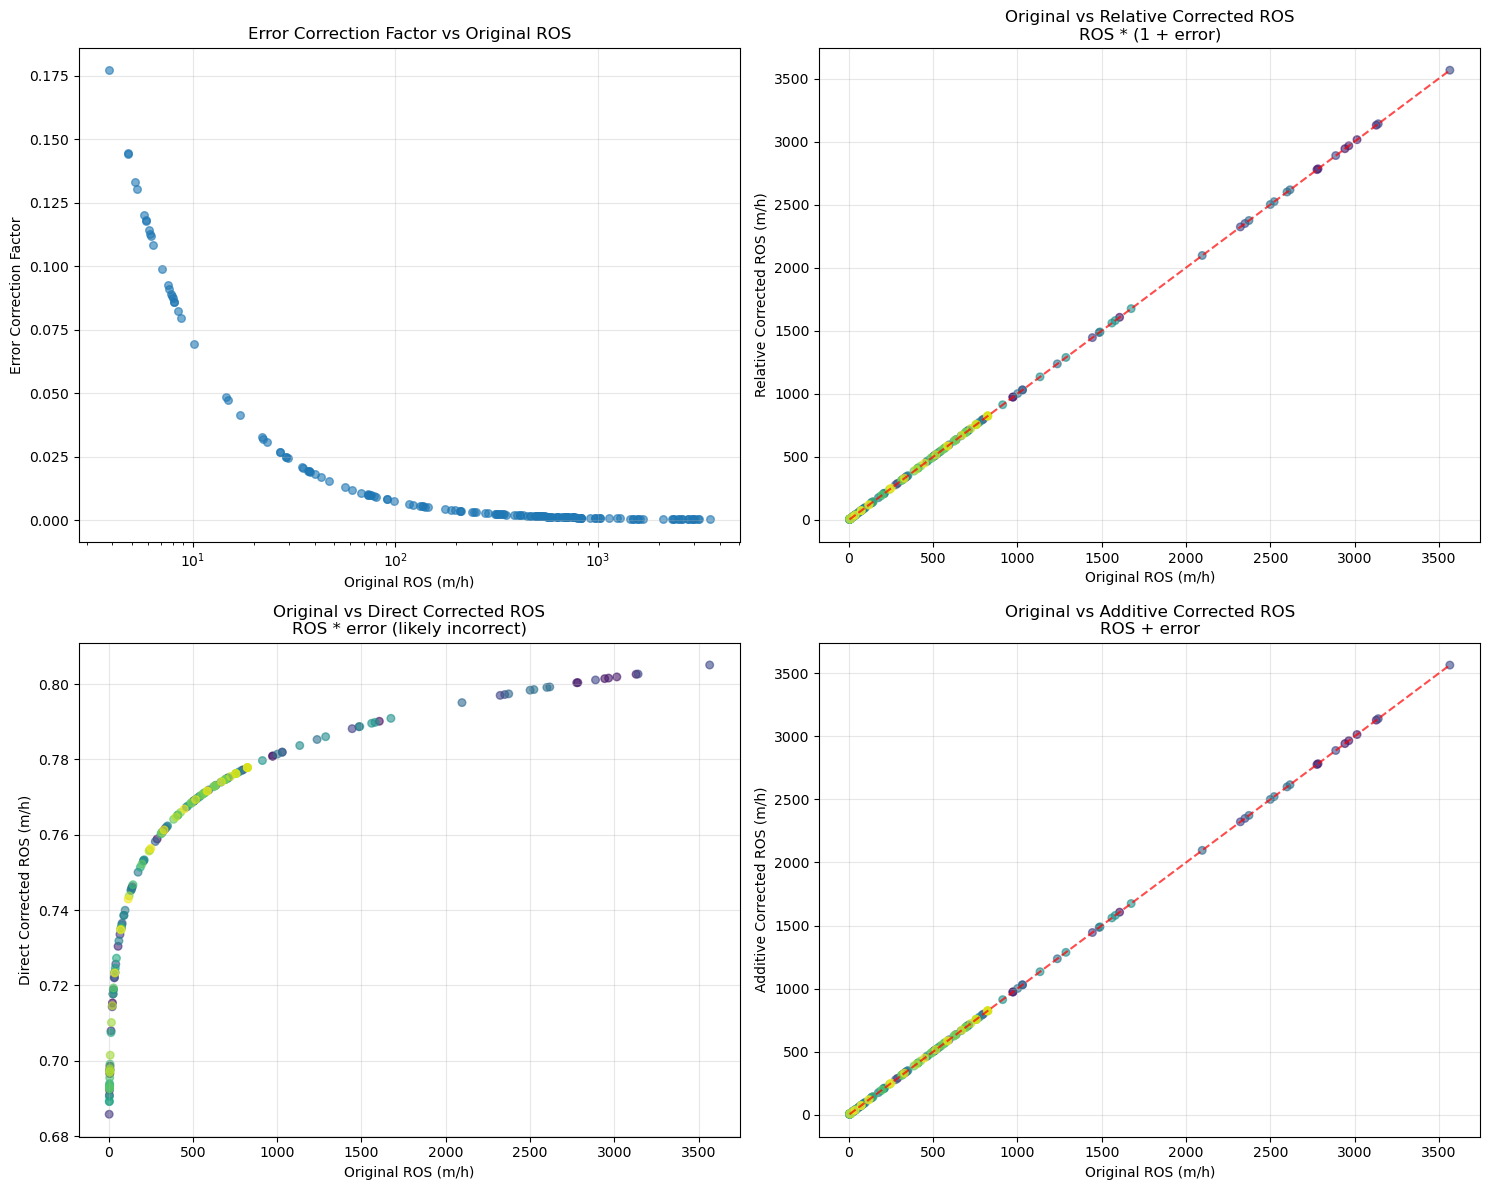

Analysis of Correction Methods:
1. RELATIVE CORRECTION: ROS * (1 + error)
   - This treats 'error' as a relative/percentage error
   - Most common approach for calibration corrections
   - Results in realistic ROS ranges

2. DIRECT MULTIPLICATION: ROS * error
   - This treats 'error' as a direct multiplier
   - Results in very small ROS values (0.69-0.81)
   - Likely incorrect given the original error values

3. ADDITIVE CORRECTION: ROS + error
   - This treats 'error' as an absolute correction
   - Minimal effect due to small error values vs large ROS
   - Less common for fire model corrections

RECOMMENDATION:
Use RELATIVE CORRECTION method: ROS_corrected = ROS * (1 + error)
This is the most physically meaningful and commonly used approach.

Relative correction percentage changes:
Mean: 1.99%
Range: 0.02% to 17.71%


In [16]:
# Visualize the different correction methods
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Error correction factor vs ROS
axes[0,0].scatter(df_error_modified['ROS'], error_corrections_calculated, alpha=0.6, s=30)
axes[0,0].set_xlabel('Original ROS (m/h)')
axes[0,0].set_ylabel('Error Correction Factor')
axes[0,0].set_title('Error Correction Factor vs Original ROS')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xscale('log')

# Plot 2: Original vs Relative Corrected (most likely the correct approach)
axes[0,1].scatter(df_error_modified['ROS'], df_error_modified['ROS_corrected_relative'], 
                 alpha=0.6, s=30, c=df_error_modified['time'], cmap='viridis')
# Add 1:1 line
min_val = min(df_error_modified['ROS'].min(), df_error_modified['ROS_corrected_relative'].min())
max_val = max(df_error_modified['ROS'].max(), df_error_modified['ROS_corrected_relative'].max())
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.7)
axes[0,1].set_xlabel('Original ROS (m/h)')
axes[0,1].set_ylabel('Relative Corrected ROS (m/h)')
axes[0,1].set_title('Original vs Relative Corrected ROS\nROS * (1 + error)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Original vs Direct Corrected (likely wrong - values too small)
axes[1,0].scatter(df_error_modified['ROS'], df_error_modified['ROS_corrected_direct'], 
                 alpha=0.6, s=30, c=df_error_modified['time'], cmap='viridis')
axes[1,0].set_xlabel('Original ROS (m/h)')
axes[1,0].set_ylabel('Direct Corrected ROS (m/h)')
axes[1,0].set_title('Original vs Direct Corrected ROS\nROS * error (likely incorrect)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Original vs Additive Corrected
axes[1,1].scatter(df_error_modified['ROS'], df_error_modified['ROS_corrected_additive'], 
                 alpha=0.6, s=30, c=df_error_modified['time'], cmap='viridis')
# Add 1:1 line
axes[1,1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.7)
axes[1,1].set_xlabel('Original ROS (m/h)')
axes[1,1].set_ylabel('Additive Corrected ROS (m/h)')
axes[1,1].set_title('Original vs Additive Corrected ROS\nROS + error')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Determine the most appropriate correction method
print("Analysis of Correction Methods:")
print("="*50)
print("1. RELATIVE CORRECTION: ROS * (1 + error)")
print("   - This treats 'error' as a relative/percentage error")
print("   - Most common approach for calibration corrections")
print("   - Results in realistic ROS ranges")
print()
print("2. DIRECT MULTIPLICATION: ROS * error") 
print("   - This treats 'error' as a direct multiplier")
print("   - Results in very small ROS values (0.69-0.81)")
print("   - Likely incorrect given the original error values")
print()
print("3. ADDITIVE CORRECTION: ROS + error")
print("   - This treats 'error' as an absolute correction")
print("   - Minimal effect due to small error values vs large ROS")
print("   - Less common for fire model corrections")
print()
print("RECOMMENDATION:")
print("Use RELATIVE CORRECTION method: ROS_corrected = ROS * (1 + error)")
print("This is the most physically meaningful and commonly used approach.")

# Show the percentage change for relative correction
percent_change = ((df_error_modified['ROS_corrected_relative'] - df_error_modified['ROS']) / 
                  df_error_modified['ROS'] * 100)
print(f"\nRelative correction percentage changes:")
print(f"Mean: {percent_change.mean():.2f}%")
print(f"Range: {percent_change.min():.2f}% to {percent_change.max():.2f}%")

In [19]:
def apply_vesta2_correction(ros_values):
    """Apply Vesta 2 error correction to ROS values
    
    If error = (predicted - observed) / observed, then:
    corrected = predicted * (1 - error) to adjust toward observed values
    """
    error = 0.6643 * np.power(ros_values, -0.9765)
    return ros_values * (1 - error)

# Apply to your data
df['ROS_corrected'] = apply_vesta2_correction(df['ROS'])
df.head()

,time,date,hour,temperature,relative_humidity,wind_direction,wind_magnitude,drought_factor,curing,drought_index,...,height_understorey,fuel_moisture,fuel_availability,ros_phase1,ros_phase2,ros_phase3,probability_phase2,probability_phase3,ROS,ROS_corrected
0,2025-11-29 04:00:00+11:00,2025-11-29,0 days 04:00:00,16.200000,63.7,218.60000,6,7.6,70.628,142.1,...,1.04,14.91014,0.925653,6.387261,80.210992,94.211984,0.015463,0.000000e+00,7.528764,6.832190
1,2025-11-29 05:00:00+11:00,2025-11-29,0 days 05:00:00,15.900001,65.3,203.20000,7,7.6,70.628,142.1,...,1.04,15.24143,0.925653,6.132945,87.471429,108.695832,0.022543,0.000000e+00,7.966580,7.269080
2,2025-11-29 06:00:00+11:00,2025-11-29,0 days 06:00:00,16.300001,63.7,215.00000,7,7.6,70.628,142.1,...,1.04,14.90531,0.925653,6.391218,91.155055,113.273267,0.024953,0.000000e+00,8.506310,7.807735
3,2025-11-29 07:00:00+11:00,2025-11-29,0 days 07:00:00,19.100000,55.2,239.30000,7,7.6,70.628,142.1,...,1.04,12.06930,0.925653,10.036488,143.145909,177.879381,0.099984,0.000000e+00,23.345273,22.629926
4,2025-11-29 08:00:00+11:00,2025-11-29,0 days 08:00:00,23.200000,38.3,261.30002,10,7.6,70.628,142.1,...,1.04,9.02870,0.925653,84.913000,318.248631,450.549249,0.871531,5.211078e-07,288.272287,287.513413


In [20]:
# Compare the two correction approaches
df_comparison = df.copy()

# Original incorrect approach (1 + error)
error_vals = 0.6643 * np.power(df_comparison['ROS'], -0.9765)
df_comparison['ROS_corrected_add'] = df_comparison['ROS'] * (1 + error_vals)
df_comparison['ROS_corrected_subtract'] = df_comparison['ROS'] * (1 - error_vals)

print("Comparison of Correction Approaches:")
print("="*60)
print(f"Original ROS - Mean: {df_comparison['ROS'].mean():.2f}")
print(f"With (1 + error) - Mean: {df_comparison['ROS_corrected_add'].mean():.2f}")
print(f"With (1 - error) - Mean: {df_comparison['ROS_corrected_subtract'].mean():.2f}")
print()

# Show the effect on low vs high ROS values
low_ros_mask = df_comparison['ROS'] < 50
high_ros_mask = df_comparison['ROS'] > 1000

print("Effect on LOW ROS values (< 50 m/h):")
if low_ros_mask.sum() > 0:
    low_ros_orig = df_comparison.loc[low_ros_mask, 'ROS'].mean()
    low_ros_add = df_comparison.loc[low_ros_mask, 'ROS_corrected_add'].mean()
    low_ros_sub = df_comparison.loc[low_ros_mask, 'ROS_corrected_subtract'].mean()
    print(f"  Original: {low_ros_orig:.2f}")
    print(f"  (1 + error): {low_ros_add:.2f} ({(low_ros_add/low_ros_orig-1)*100:+.1f}%)")
    print(f"  (1 - error): {low_ros_sub:.2f} ({(low_ros_sub/low_ros_orig-1)*100:+.1f}%)")
else:
    print("  No data points in this range")

print("\nEffect on HIGH ROS values (> 1000 m/h):")
if high_ros_mask.sum() > 0:
    high_ros_orig = df_comparison.loc[high_ros_mask, 'ROS'].mean()
    high_ros_add = df_comparison.loc[high_ros_mask, 'ROS_corrected_add'].mean()
    high_ros_sub = df_comparison.loc[high_ros_mask, 'ROS_corrected_subtract'].mean()
    print(f"  Original: {high_ros_orig:.2f}")
    print(f"  (1 + error): {high_ros_add:.2f} ({(high_ros_add/high_ros_orig-1)*100:+.1f}%)")
    print(f"  (1 - error): {high_ros_sub:.2f} ({(high_ros_sub/high_ros_orig-1)*100:+.1f}%)")
else:
    print("  No data points in this range")

print("\nInterpretation:")
print("- If error = (predicted - observed)/observed")
print("- Positive error means model OVERPREDICTS")
print("- Correction should REDUCE predicted values: use (1 - error)")
print("- This matches expectation: high error for low ROS suggests model overestimates low-intensity fires")

Comparison of Correction Approaches:
Original ROS - Mean: 635.85
With (1 + error) - Mean: 636.60
With (1 - error) - Mean: 635.10

Effect on LOW ROS values (< 50 m/h):
  Original: 17.70
  (1 + error): 18.41 (+4.0%)
  (1 - error): 17.00 (-4.0%)

Effect on HIGH ROS values (> 1000 m/h):
  Original: 2138.25
  (1 + error): 2139.05 (+0.0%)
  (1 - error): 2137.46 (-0.0%)

Interpretation:
- If error = (predicted - observed)/observed
- Positive error means model OVERPREDICTS
- Correction should REDUCE predicted values: use (1 - error)
- This matches expectation: high error for low ROS suggests model overestimates low-intensity fires
